In [1]:
import jax
jax.config.update("jax_enable_x64", True)

In [2]:
from tinygp import kernels
kernel = kernels.ExpSquared(scale=1.5)

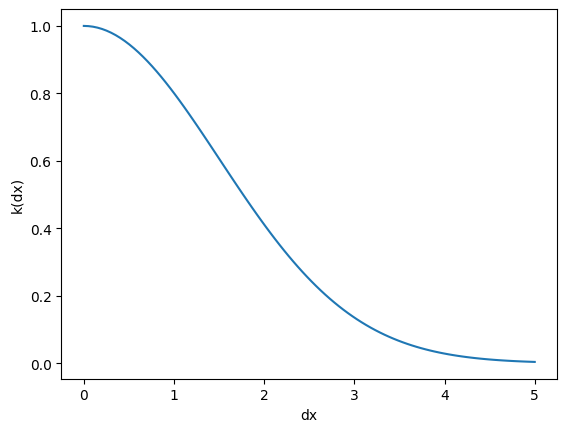

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def plot_kernel(kernel, **kwargs):
    dx = np.linspace(0, 5, 100)
    plt.plot(dx, kernel(dx, dx[:1]), **kwargs)
    plt.xlabel("dx")
    plt.ylabel("k(dx)")
plot_kernel(kernel)

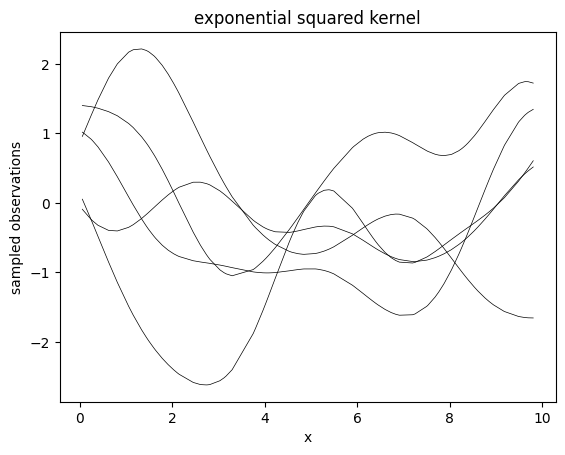

In [9]:
from tinygp import GaussianProcess
X = np.sort(np.random.default_rng(1).uniform(0, 10, 100))
gp = GaussianProcess(kernel, X)

y = gp.sample(jax.random.PRNGKey(4), shape=(5,))
plt.plot(X, y.T, color="k", lw=0.5)
plt.xlabel("x")
plt.ylabel("sampled observations")
_ = plt.title("exponential squared kernel")